### Libraries

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Utils

In [0]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#0000FF', '#000000', '#FF0000', '#66FF66','#FFFF66', '#9999FF', '#660033', '#FF6666', '#C0C0C0']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title('Dataset PCA (n_components = 2)')

    plt.show()

In [0]:
%matplotlib inline

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## The simple autoencoder

In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 -> compression of factor 24.5, assuming the input is 784

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

### Encoder model

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

### Decoder model

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Load mnist data 

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Train the model

In [0]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 2s 35us/step - loss: 0.3587 - val_loss: 0.2701
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2621 - val_loss: 0.2497
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2373 - val_loss: 0.2235
Epoch 4/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2158 - val_loss: 0.2058
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2013 - val_loss: 0.1940
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1910 - val_loss: 0.1851
Epoch 7/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1831 - val_loss: 0.1780
Epoch 8/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1763 - val_loss: 0.1717
Epoch 9/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1705 - val_loss: 0.16

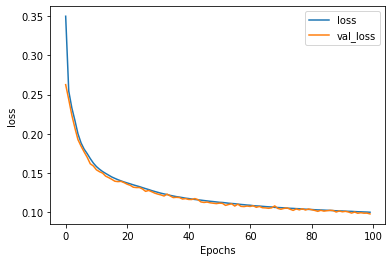

In [14]:
plot_graphs(history, "loss")

### Test the encoder and decoder model

In [0]:
# encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

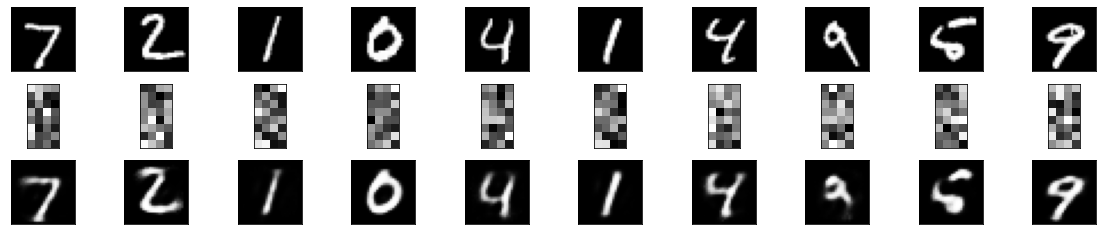

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Plot 2-D diagram by PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10).fit(encoded_imgs)

X_pca = pca.transform(encoded_imgs)

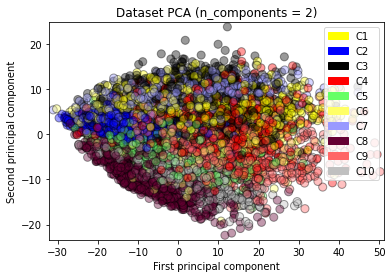

In [0]:
plot_labelled_scatter(X_pca, y_test, ['C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10'])

## Deep autoencoder

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
encoder = Model(input_img, encoded)

In [12]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               1011

In [13]:
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 10s 161us/step - loss: 0.3241 - val_loss: 0.2637
Epoch 2/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2574 - val_loss: 0.2511
Epoch 3/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2416 - val_loss: 0.2316
Epoch 4/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2201 - val_loss: 0.2058
Epoch 5/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1979 - val_loss: 0.1913
Epoch 6/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1868 - val_loss: 0.1818
Epoch 7/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1798 - val_loss: 0.1766
Epoch 8/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1747 - val_loss: 0.1711
Epoch 9/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1698 - val

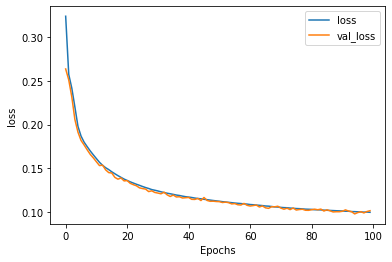

In [14]:
plot_graphs(history, "loss")

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

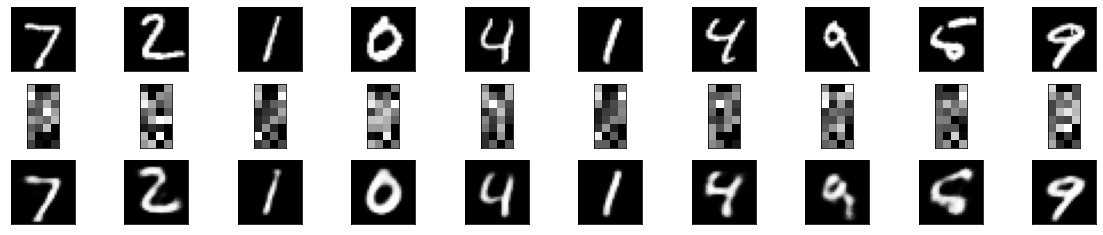

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Plot 2-D diagram by PCA

In [0]:
pca = PCA(n_components = 10).fit(encoded_imgs)
X_pca = pca.transform(encoded_imgs)

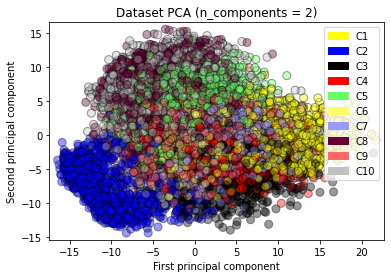

In [0]:
plot_labelled_scatter(X_pca, y_test, ['C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10'])

### Plot 2-D diagram by t-SNE

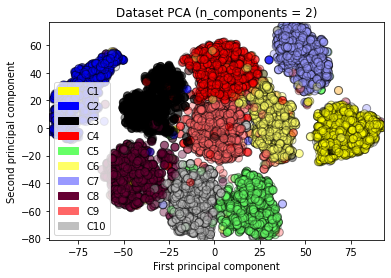

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)
X_tsne = tsne.fit_transform(encoded_imgs)
plot_labelled_scatter(X_tsne, y_test, ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'])

### Cosine similarity of the encoded images

In [0]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x, 2) * np.linalg.norm(y, 2)) 

In [20]:
print(encoded_imgs[0])
#print(encoded_imgs[2])
#print(encoded_imgs[5])
#print(encoded_imgs[4])
#print(encoded_imgs[6])

[ 7.024865    7.3909845   0.51053303  2.659687   10.149673    7.955921
  6.8734264   3.7517405   0.          6.636507    9.010723    5.9427257
  4.7474465   4.3195405   0.          0.         10.089009    3.1546957
  1.029666    3.4065943   0.         11.093003   10.728689    0.14738843
 14.870366    0.          1.4077352   6.6541104   3.9899466   7.470483
  6.460534    8.510825  ]


In [25]:
print(cosine_similarity(encoded_imgs[2], encoded_imgs[5])) # both 1
print(cosine_similarity(encoded_imgs[4], encoded_imgs[6])) # both 4
print(cosine_similarity(encoded_imgs[2], encoded_imgs[6]))
print(cosine_similarity(encoded_imgs[0], encoded_imgs[2]))
print(cosine_similarity(encoded_imgs[0], encoded_imgs[6]))

0.98785913
0.8930665
0.7461208
0.7961821
0.8507102


In [30]:
print(cosine_similarity(encoded_imgs[7], encoded_imgs[6032]))
print(cosine_similarity(encoded_imgs[7], encoded_imgs[6022]))

0.9751041
0.9763139


### Nearest Neighbors

In [0]:
from sklearn.neighbors import NearestNeighbors

In [33]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(encoded_imgs)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [53]:
target_key = 28
neighbors = neigh.kneighbors([encoded_imgs[target_key]],5, return_distance=False)
print(neighbors)

[[  28 5321 5652 5592 7279]]


In [54]:
# make index dictionary for drawing
keys = [0,1,2,3,4]
values = list(neighbors[0])
to_draw = dict(zip(keys,values))
print(to_draw)

{0: 28, 1: 5321, 2: 5652, 3: 5592, 4: 7279}


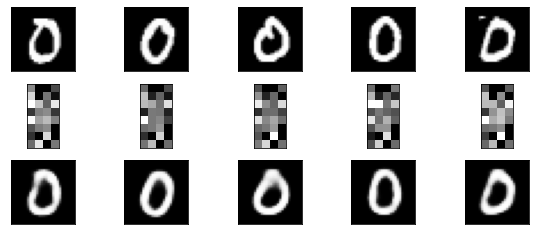

In [55]:
n = 10
plt.figure(figsize=(20, 4))
for i, k in to_draw.items():
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[k].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional autoencoder

In [26]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [28]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [30]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 163us/step - loss: 0.2215 - val_loss: 0.1704
Epoch 2/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1586 - val_loss: 0.1542
Epoch 3/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1434 - val_loss: 0.1369
Epoch 4/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1355 - val_loss: 0.1326
Epoch 5/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1301 - val_loss: 0.1250
Epoch 6/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1262 - val_loss: 0.1246
Epoch 7/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1233 - val_loss: 0.1211
Epoch 8/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.1211 - val_loss: 0.1184
Epoch 9/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1191 - val_loss: 0.1184
Epo

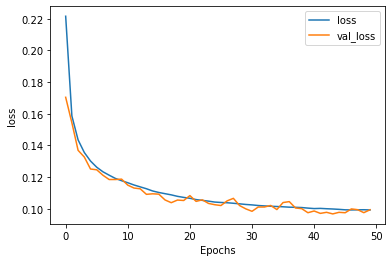

In [31]:
plot_graphs(history, "loss")

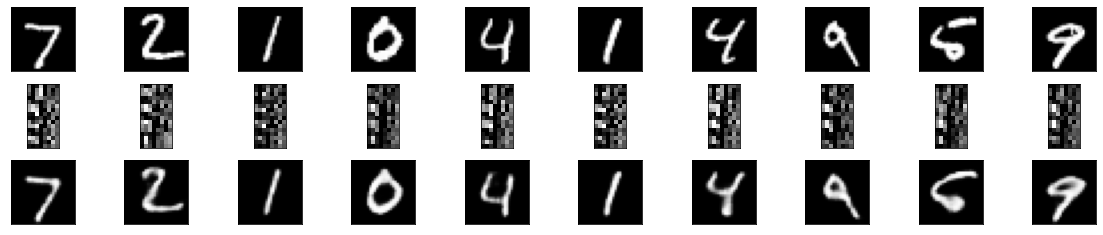

In [32]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

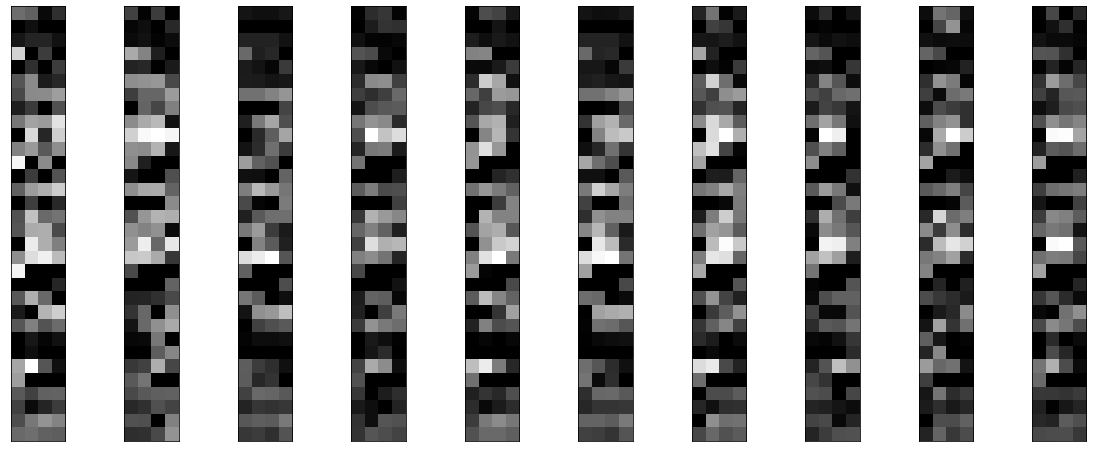

In [33]:
# Another type of encoded images
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Cosine similarity of the encoded images

In [37]:
print(encoded_imgs[0].reshape(4 * 4 * 8))
#print(encoded_imgs[2])
#print(encoded_imgs[5])
#print(encoded_imgs[4])
#print(encoded_imgs[6])

[0.87456    0.         0.18311547 1.6876136  0.         0.6810635
 0.5980289  0.2413921  0.9593568  0.         1.0418539  1.9712614
 0.         0.77797556 0.         0.65275913 0.6863359  0.
 1.1408179  1.9596722  0.         0.71177846 0.21474382 0.69447803
 0.         0.         1.3334252  1.2708323  0.7147249  0.5245654
 0.6189173  0.8445147  0.7827102  0.12618507 0.2921065  0.
 0.37990287 1.1108603  1.1106888  0.47928798 1.303616   1.7400788
 1.2318244  0.         0.4795558  1.2518823  0.5007768  1.5526417
 1.3686604  1.8856107  1.7685964  0.         0.         1.4006562
 0.01035422 1.0265594  0.19001254 0.11663126 2.0478776  0.
 0.5229825  0.08033121 0.95239687 0.88684    0.07864971 0.
 0.2959786  0.4806142  0.01416659 0.22364569 1.1178651  0.
 1.2478765  0.30442727 0.7131909  1.1196237  0.         1.3947572
 0.         0.85154325 1.3954434  1.3965619  1.9235996  0.
 0.         0.8349616  1.4410344  0.6655622  0.0426127  0.
 0.6844273  0.         0.7873584  0.2902925  1.1802704  0.

In [39]:
print(cosine_similarity(encoded_imgs[2].reshape(4 * 4 * 8), encoded_imgs[5].reshape(4 * 4 * 8))) # both 1
print(cosine_similarity(encoded_imgs[4].reshape(4 * 4 * 8), encoded_imgs[6].reshape(4 * 4 * 8))) # both 4
print(cosine_similarity(encoded_imgs[7].reshape(4 * 4 * 8), encoded_imgs[9].reshape(4 * 4 * 8))) # both 9
print(cosine_similarity(encoded_imgs[2].reshape(4 * 4 * 8), encoded_imgs[6].reshape(4 * 4 * 8))) # 1 and 4
print(cosine_similarity(encoded_imgs[0].reshape(4 * 4 * 8), encoded_imgs[2].reshape(4 * 4 * 8))) # 7 and 1
print(cosine_similarity(encoded_imgs[0].reshape(4 * 4 * 8), encoded_imgs[6].reshape(4 * 4 * 8))) # 7 and 4

0.97818613
0.95058686
0.8642167
0.82494766
0.8627999
0.9034629


Reference:
https://blog.keras.io/building-autoencoders-in-keras.html